### A comparison different test statistics, using AUC ROC

Consider a two distributions, $H_0$ and $H_A$

We'll choose a specific $H_A$ so we can calculate power but will revisit this later.

We will take a bunch of samples from each, and use a hypothesis test to distinguish them.

In [64]:
from scipy import stats
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
h0 = stats.norm(0, 1)
ha = stats.norm(0.5, 1)

In [73]:
sample_size = 5
n_samples = 10000
data = np.zeros((n_samples, sample_size))
data[0:n_samples//2] = h0.rvs((n_samples//2, sample_size))
data[n_samples//2:] = ha.rvs((n_samples//2, sample_size))
labels = np.concatenate([np.zeros(n_samples//2), np.ones(n_samples//2)])

Let's consider two statistics. One uses the unbiased variance. Which is better?

In [74]:
se1 = data.mean(axis=1) / np.sqrt(data.var(axis=1)/sample_size)
se2 = data.mean(axis=1) / np.sqrt(data.var(axis=1, ddof=1)/sample_size)

In [75]:
print(f"AUC for regular SE: {roc_auc_score(labels, se1)}")
print(f"AUC for regular SE: {roc_auc_score(labels, se2)}")

AUC for regular SE: 0.7685536
AUC for regular SE: 0.7685536


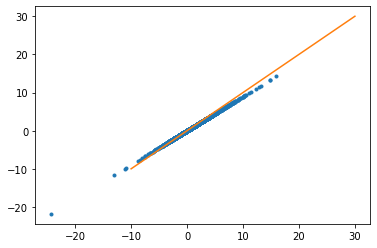

In [76]:
fig, ax = plt.subplots()
ax.plot(se1, se2, '.')
ax.plot([-10, 30], [-10, 30])

Crap. They are just ratios of each other. Well, of course they are. That wasn't interesting.

Okay, let's try the median divided by the ratio of the min and max. Probably a pretty bad statistic.

In [77]:
stat2 = np.median(data, axis=1) / (data.max() - data.min())

In [78]:
print(f"AUC with SE:        {roc_auc_score(labels, se1)}")
print(f"AUC with med/range: {roc_auc_score(labels, stat2)}")

AUC with SE:        0.7685536
AUC with med/range: 0.74645716


Confirmed!